# VISUALIZACION

In [1]:
pip install --upgrade pandas-datareader

Requirement already up-to-date: pandas-datareader in c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages (0.10.0)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Usuario\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
#importamos lo datos
from pandas_datareader import data as  pdr
from datetime import datetime

start = datetime(2022, 9, 1)
end = datetime(2022, 10, 31)

index = 'FDX'
df = pdr.get_data_yahoo(index, start = start, end = end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-09-01,212.100006,206.970001,209.449997,211.860001,1582400.0,211.860001
2022-09-02,214.410004,207.229996,214.199997,208.720001,1422700.0,208.720001
2022-09-06,206.899994,202.330002,204.990005,204.169998,2359200.0,204.169998
2022-09-07,202.369995,196.889999,201.399994,201.619995,3098800.0,201.619995
2022-09-08,203.009995,197.559998,200.679993,202.869995,2474700.0,202.869995
2022-09-09,209.570007,204.539993,204.800003,209.070007,1739400.0,209.070007
2022-09-12,215.830002,210.259995,210.259995,213.839996,2278900.0,213.839996
2022-09-13,210.270004,204.100006,208.889999,205.339996,1589800.0,205.339996
2022-09-14,205.460007,200.910004,204.710007,205.009995,1510700.0,205.009995


### Grafico de Lineas

<AxesSubplot: xlabel='Date'>

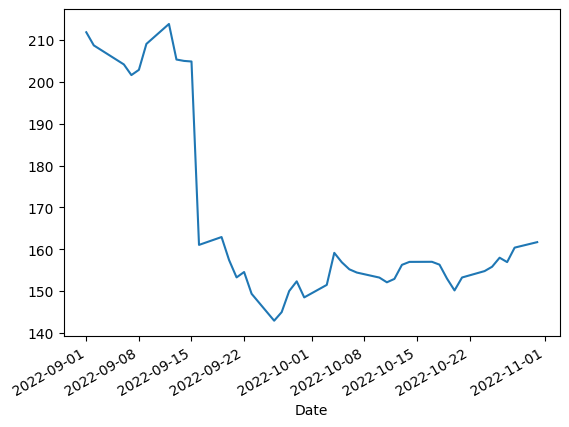

In [3]:
import matplotlib.pyplot as plt
df['Close'].plot(kind='line')

### Grafico de Velas

In [4]:
!pip install nbformat 

You should consider upgrading via the 'c:\users\usuario\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [5]:
import plotly.graph_objects as go

graph = {
    'x': df.index,
    'open': df.Open,
    'close': df.Close,
    'high': df.High,
    'low': df.Low,
    'type': 'candlestick',
    'name': 'FDX',
    'showlegend': True
}

layout = go.Figure(
    data = [graph],
    layout_title= "FedEx Stock"
)

layout

### Grafico de Barras

In [6]:
!pip install mplfinance

You should consider upgrading via the 'c:\users\usuario\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\mplfinance\_styles.py:24: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



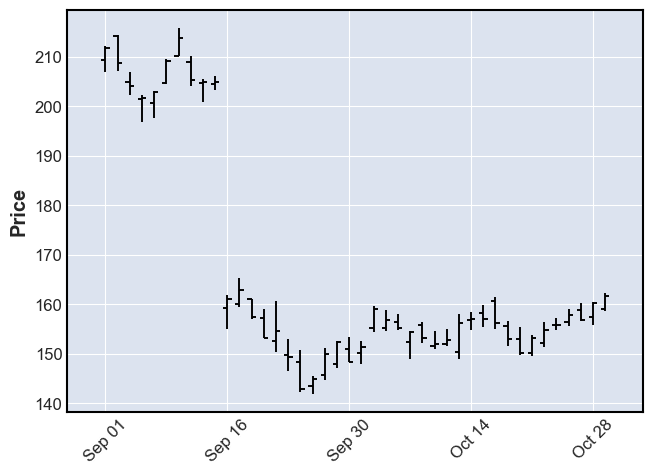

In [8]:
import mplfinance as mpf
mpf.plot(df, type = 'ohlc')

### Graficar 2 o mas acciones en un mismo grafico

In [13]:
#importamos 2 acciones en el mismo lapso de tiempo que la primera
start = datetime(2021, 1, 1)
end = datetime(2022, 10, 31)

df2 = pdr.get_data_yahoo('MSFT', start = start, end = end)
df3 = pdr.get_data_yahoo('FDX', start = start, end = end)

In [14]:
#agregamos las columnas necesarias para que solo nos queden los valores de clausura de cada accion
df3['FDX'] = df3['Close']
df3['MSFT'] = df2['Close']
df3 = df3.drop(columns=['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], axis = 1)
df3.head()

,FDX,MSFT
Date,,
2021-01-04,253.190002,217.690002
2021-01-05,253.179993,217.899994
2021-01-06,253.559998,212.250000
2021-01-07,246.029999,218.289993
2021-01-08,244.960007,219.619995


<AxesSubplot: xlabel='Date'>

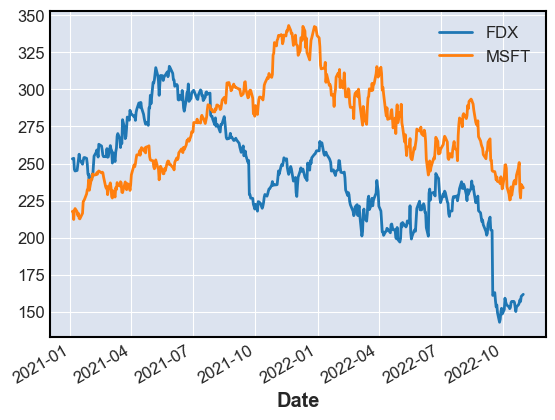

In [15]:
df3.plot(kind='line')

Otras opciones para poder visualizar la información en python. Dependiendo del tipo de datos que se tengan, hay mejores opciones para visualizarlos:

* ‘line’ : line plot (default)
* ‘bar’ : vertical bar plot
* ‘barh’ : horizontal bar plot
* ‘hist’ : histogram
* ‘box’ : boxplot
* ‘kde’ : Kernel Density Estimation plot
* ‘density’ : same as ‘kde’
* ‘area’ : area plot
* ‘pie’ : pie plot
* ‘scatter’ : scatter plot
* ‘hexbin’ : hexbin plot